In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from skimage import color
from skimage import io
from skimage.transform import rescale, resize
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K
from keras.models import Sequential
import tensorflow as tf
import warnings

In [2]:
import os
f=[] 
def listdirs(rootdir):
    for file in os.listdir(rootdir):
        d = os.path.join(rootdir, file)
        if os.path.isdir(d):
            print(d)
            f.append(d)
            listdirs(d)
 
rootdir = '../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets'
listdirs(rootdir)

../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_aca
../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_scc
../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_n


In [3]:
import pandas as pd
from pathlib import Path

image_dir_path = '../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_n'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.jpeg')]
df1 = pd.DataFrame(data=paths, columns=['Root', 'Type', 'Images'])
print(df1)


image_dir_path = '../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_scc'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.jpeg')]
df2 = pd.DataFrame(data=paths, columns=['Root', 'Type', 'Images'])
print(df2)
image_dir_path ='../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_aca'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.jpeg')]
df3 = pd.DataFrame(data=paths, columns=['Root', 'Type', 'Images'])
print(df3)

                 Root    Type          Images
0     lung_image_sets  lung_n   lungn691.jpeg
1     lung_image_sets  lung_n  lungn3098.jpeg
2     lung_image_sets  lung_n  lungn4225.jpeg
3     lung_image_sets  lung_n    lungn40.jpeg
4     lung_image_sets  lung_n  lungn4213.jpeg
...               ...     ...             ...
4995  lung_image_sets  lung_n  lungn1469.jpeg
4996  lung_image_sets  lung_n  lungn1508.jpeg
4997  lung_image_sets  lung_n  lungn1966.jpeg
4998  lung_image_sets  lung_n  lungn4090.jpeg
4999  lung_image_sets  lung_n   lungn554.jpeg

[5000 rows x 3 columns]
                 Root      Type            Images
0     lung_image_sets  lung_scc  lungscc1930.jpeg
1     lung_image_sets  lung_scc  lungscc1441.jpeg
2     lung_image_sets  lung_scc  lungscc4624.jpeg
3     lung_image_sets  lung_scc  lungscc4038.jpeg
4     lung_image_sets  lung_scc  lungscc2504.jpeg
...               ...       ...               ...
4995  lung_image_sets  lung_scc  lungscc3958.jpeg
4996  lung_image_sets  

In [4]:
df = pd.concat([df1,df2,df3])
df.reset_index()

,index,Root,Type,Images
0,0,lung_image_sets,lung_n,lungn691.jpeg
1,1,lung_image_sets,lung_n,lungn3098.jpeg
2,2,lung_image_sets,lung_n,lungn4225.jpeg
3,3,lung_image_sets,lung_n,lungn40.jpeg
4,4,lung_image_sets,lung_n,lungn4213.jpeg
...,...,...,...,...
14995,4995,lung_image_sets,lung_aca,lungaca3823.jpeg
14996,4996,lung_image_sets,lung_aca,lungaca2457.jpeg
14997,4997,lung_image_sets,lung_aca,lungaca4147.jpeg
14998,4998,lung_image_sets,lung_aca,lungaca1477.jpeg


In [5]:
df.describe()

,Root,Type,Images
count,15000,15000,15000
unique,1,3,15000
top,lung_image_sets,lung_n,lungn691.jpeg
freq,15000,5000,1


In [6]:
import os
os.makedirs('/kaggle/working/lung_n')
os.makedirs('/kaggle/working/lung_scc')
os.makedirs('/kaggle/working/lung_aca')

In [7]:
y = df.filter(['Type'])

In [8]:
y

,Type
0,lung_n
1,lung_n
2,lung_n
3,lung_n
4,lung_n
...,...
4995,lung_aca
4996,lung_aca
4997,lung_aca
4998,lung_aca


In [9]:
y['Type'].values[0]

'lung_n'

In [10]:
from zipfile import ZipFile
from PIL import Image
import os
def prepareImages(data, m, dataset):
    img_size=331
    print("Preparing images")
    X_train = np.zeros((m, img_size, img_size, 1))
    count = 0
    p=0
    for index,row in df.iterrows():
        img = image.load_img(r"../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/"+row["Type"]+"/"+row["Images"])
        img_rgb = Image.open(r"../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/"+row["Type"]+"/"+row["Images"])
        img_cmyk = img_rgb.convert('YCbCr')
        img_cmyk.save(r"./"+y['Type'].values[count]+"/"+"processed"+str(count)+".jpeg")
        count += 1

In [11]:
df.shape[0]

15000

In [12]:
prepareImages(df, df.shape[0], "train")

Preparing images


In [13]:
import itertools
import cv2
import os
import time

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.applications.efficientnet import EfficientNetB7  as PretrainedModel, preprocess_input
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from glob import glob

In [14]:
folders = glob('../working/*')
print(len(folders))

4


In [15]:
data_dir = '../working/'
data = ImageDataGenerator(validation_split = 0.2)
BATCH_SIZE = 128
X = Y = 224
train_ds = data.flow_from_directory(data_dir,
                                    class_mode = "categorical",
                                    target_size = (X, Y),
                                    color_mode="rgb",
                                    batch_size = BATCH_SIZE, 
                                    shuffle = False,
                                    subset='training',
                                    seed = 42)

Found 12000 images belonging to 4 classes.


In [16]:
validation = data.flow_from_directory(data_dir,
                                      class_mode = "categorical",
                                      target_size = (X, Y),
                                      color_mode="rgb",
                                      batch_size = BATCH_SIZE, 
                                      shuffle = False,
                                      subset='validation',
                                      seed = 42)

Found 3000 images belonging to 4 classes.


In [17]:
ptm = PretrainedModel(
    input_shape=(X, Y, 3),
    weights='imagenet',
    include_top=False)

ptm.trainable = False

K = len(folders)

x = GlobalAveragePooling2D()(ptm.output)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

y = Dense(K, activation='softmax')(x)

model = Model(inputs=ptm.input, outputs=y)

2022-11-12 11:19:41.158716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 11:19:41.160086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 11:19:41.328142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 11:19:41.329575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 11:19:41.330755: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

258088960/258076736 [==============================] - 1s 0us/step


In [18]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_ds,
    validation_data=validation,
    epochs=20,
    callbacks=[early_stopping])

2022-11-12 11:19:53.097451: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-11-12 11:20:12.814396: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


94/94 [==============================] - 237s 2s/step - loss: 0.4637 - accuracy: 0.8092 - val_loss: 0.1843 - val_accuracy: 0.9330
Epoch 2/20
94/94 [==============================] - 200s 2s/step - loss: 0.1892 - accuracy: 0.9269 - val_loss: 0.3741 - val_accuracy: 0.8497
Epoch 3/20
94/94 [==============================] - 200s 2s/step - loss: 0.1778 - accuracy: 0.9309 - val_loss: 0.1297 - val_accuracy: 0.9517
Epoch 4/20
94/94 [==============================] - 200s 2s/step - loss: 0.1587 - accuracy: 0.9383 - val_loss: 0.1770 - val_accuracy: 0.9260
Epoch 5/20
94/94 [==============================] - 200s 2s/step - loss: 0.1471 - accuracy: 0.9426 - val_loss: 0.1063 - val_accuracy: 0.9547
Epoch 6/20
94/94 [==============================] - 200s 2s/step - loss: 0.1155 - accuracy: 0.9562 - val_loss: 0.1295 - val_accuracy: 0.9487
Epoch 7/20
94/94 [==============================] - 201s 2s/step - loss: 0.1048 - accuracy: 0.9588 - val_loss: 0.0934 - val_accuracy: 0.9610
Epoch 8/20
94/94 [======

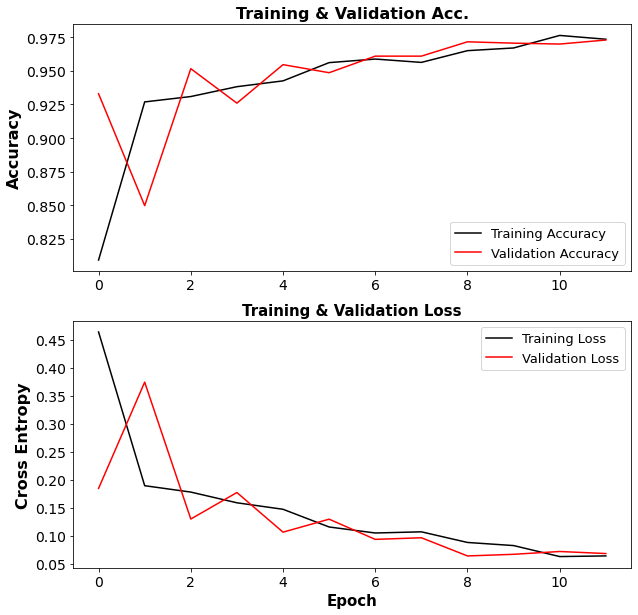

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='black')
plt.plot(val_acc, label='Validation Accuracy', color='red')


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Training & Validation Acc.', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='black')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

In [22]:
from sklearn.metrics import classification_report

Y_pred = model.predict(validation)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(validation.classes, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96      1000
           2       1.00      1.00      1.00      1000
           3       0.99      0.93      0.96      1000

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

Normalized confusion matrix


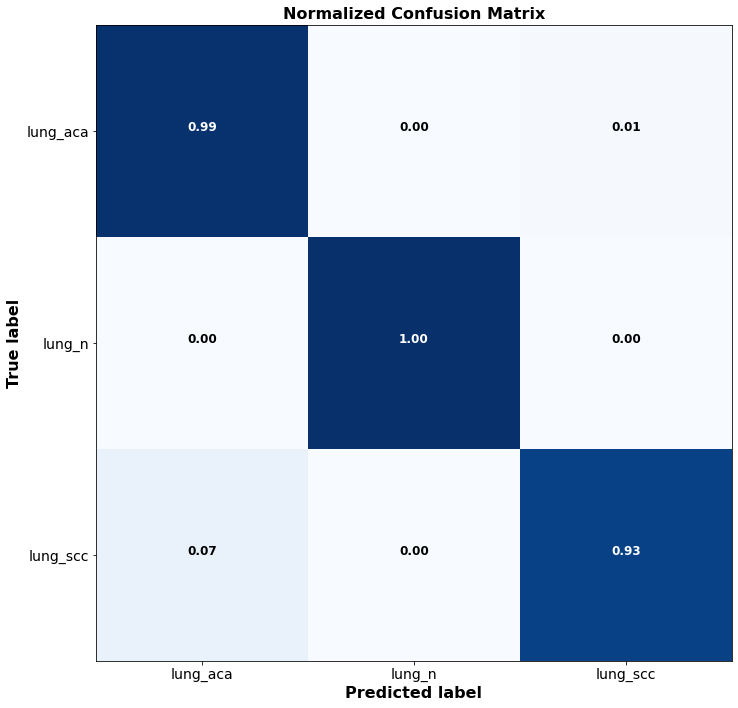

In [24]:
cnf_matrix = confusion_matrix(validation.classes, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['lung_aca', 'lung_n', 'lung_scc'],normalize=True,
                      title='Normalized Confusion Matrix')
plt.show()